In [1]:
import os, getpass
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Enter {var}: ")

_set_env("OPENAI_API_KEY")

In [2]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-3.5-turbo")

In [3]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

sys_msg = SystemMessage(content="You are a helpful assistant to respond to general purpose queries.")

def assistant(state: MessagesState):
    return {"messages": [llm.invoke([sys_msg] + state["messages"])]}

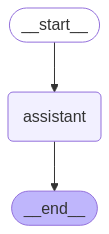

In [4]:
from langgraph.graph import START, END, StateGraph
from IPython.display import Image, display

builder = StateGraph(MessagesState)

# Add nodes and edges
builder.add_node("assistant", assistant)
builder.add_edge(START, "assistant")
builder.add_edge("assistant", END)

react_graph = builder.compile()

display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [5]:
messages = [HumanMessage(content="What is the capital of France?")]

# 20250423: You exceeded your current quota, please check your plan and billing details. Get a new API key.
messages = react_graph.invoke({"messages": messages})

for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the capital of France?
================================== Ai Message ==================================

The capital of France is Paris.
